<a href="https://colab.research.google.com/github/Laceles/Titanic-Spaceship/blob/main/Spaceship_Titanic_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biblitecas

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Análise exploratória dos dados

In [2]:
sample = pd.read_csv('sample_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


O objetivo do projeto é gerar um modelo preditivo que identificará quais tripulantes de uma nave foram transportados para uma outra dimenção após o contato com uma singularidade. Essa previsão deve ser feita com o uso das variáveis plotadas referente as características de seus passageiros.

 Discutindo as variáveis

*   PassengerId: Id de identificação do passageiro. Os quatro primeiros dígitos são do grupo em que o passageiro se encontrava, sendo os dois últimos digítos o número do passageiro dentro do grupo.
*   HomePlanet: Planete de origem do passageiro.
*   CryoSleep: Indica se o passageiro se elegeu para ser posto sob animação suspensa durante o trajeto. Esses passageiros estavam permanentemente confinados em suas cabines. 
*   Cabin: Identificação da cabine de cada um dos passageiros; o 1° e 2° números são os do seu deck, 3° e 4° o registro da cabine, 5° e 6° a posição do deck. P = bombordo e S = estibordo. 
*   Destination: Planeta em que o passageiro irá desembarcar.
*   Age: Idade do passageiro.
*   VIP: Identifica se o passageiro pagou por serviços especiais durante a viagem.
*   RoomService, FoodCourt, ShoppingMall, Spa, VRDeck: Quanto o passageiro pagou desses serviços durante a viagem.
*   Name: Nome do passageiro
*   Transported: Se o passageiro foi transportado ou não. 



1.   Inicialmente as variáveis de idade, compra, Spa, serviço de quarto, comida e Spa terão seus valores nulos substituindo pelas médias. Caso essas variáveis não influenciem no target serão excluídas do dataset.
2.   Valores compostos serão divididos em outras colunas. Com isso será possível encontrar mais variáveis. 
3.   As variáveis categóricas serão cruzadas com o target parar encontrar para encontrar relação entre os as características e os passageiros desaparecidos. 
4.   Observar qual a proporção de desaparecidos por planeta de origem, por destino, por confinamento em cabine (animação suspensa), por grupo de viagem e por sua localização de hospedagem na nave.
















Os atributos numéricos e categóricos serão trabalhados de maneira separada. 

In [6]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [93]:
train[['id_g','grupo']] = train['PassengerId'].str.split('_', expand=True)

In [113]:
train[['deck','cabin_register','position']] = train['Cabin'].str.split('/', expand=True)

In [114]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,id_g,grupo,deck,cabin_register,position
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,01,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,01,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,01,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,01,E,608,S


In [118]:
df_numeric = train.select_dtypes(include= 'float64')
df_object = train.select_dtypes(include=['object','bool'])

In [117]:
df_object.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

In [125]:
fig=px.imshow(pd.crosstab(df_object['HomePlanet'],df_object["Transported"]).T,text_auto=True)
fig.update_layout(title='HomePlanet'+" vs Transported", title_font_size=30,font_size=20,title_x=0.5,hoverlabel_font_size=20)
fig.show()

In [8]:
Tdf_object.shape, df_object.columns

((8693, 7),
 Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
        'Name'],
       dtype='object'))

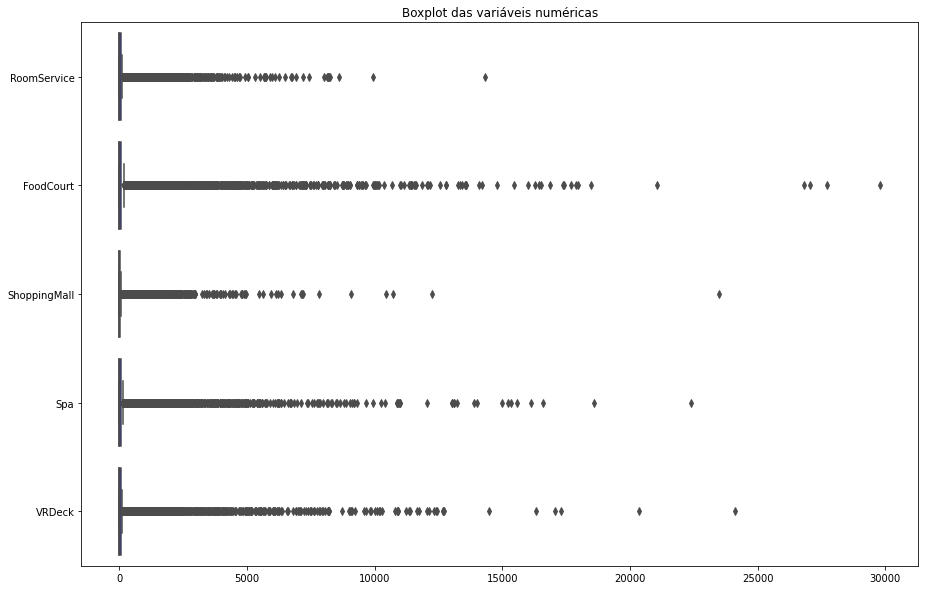

In [65]:

fig = plt.subplots(figsize=(15, 10))
sns.boxplot(orient = 'h',color='Blue', data = df_numeric.drop(columns = ['Age']))
plt.title('Boxplot das variáveis numéricas');

In [68]:
Ncolumns = list(df_numeric.columns)

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [76]:
Ncolumns = list(df_numeric.columns)
for x in Ncolumns:
  y = df_numeric[x].mean()
  df_numeric[x].fillna(y, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [77]:
df_numeric.isna().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [47]:
#fig = plt.subplots(figsize=(20, 20))
#df_numeric.boxplot()
#plt.show()